In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('out.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'suhu udara', 'kelembaban udara', 'suhu tanah',
       'kelembaban tanah', 'cahaya', 'arus solar', 'arus aki',
       'tegangan solar', 'tegangan aki', 'status'],
      dtype='object')

In [4]:
def discretization(attr):
    inp = list(df[attr].to_numpy())
    midi = df[attr].describe()
    out = []
    for x in inp:
        if(x<=float(midi.loc['25%'])):
            out.append(0)
        elif(x>float(midi.loc['25%']) and x<=float(midi.loc['50%'])):
            out.append(1)
        elif(x>float(midi.loc['50%']) and x<=float(midi.loc['75%'])):
            out.append(2)
        else:
            out.append(3)
    return out

In [5]:
def multiDiscretization(attrs):
    df_desc = pd.DataFrame()
    for x in attrs:
        df_desc[x] = pd.Series(discretization(x),index=df.index)
    return df_desc

In [6]:
df_desc = multiDiscretization(['suhu udara', 'kelembaban udara', 'suhu tanah',
       'kelembaban tanah', 'cahaya', 'arus solar', 'arus aki',
       'tegangan solar', 'tegangan aki'])

In [7]:
df_desc['status'] = pd.Series(df['status'],index=df.index)

In [8]:
df_desc

,suhu udara,kelembaban udara,suhu tanah,kelembaban tanah,cahaya,arus solar,arus aki,tegangan solar,tegangan aki,status
0,0,2,3,2,0,0,3,3,3,mendung siram
1,1,3,1,2,0,0,2,3,3,mendung siram
2,0,3,1,2,1,1,3,3,3,mendung siram
3,0,3,0,2,0,0,3,3,3,mendung siram
4,0,3,1,2,0,0,1,3,3,mendung siram
...,...,...,...,...,...,...,...,...,...,...
59865,2,0,1,1,2,2,1,1,2,cerah kering
59866,1,0,2,0,1,1,0,2,2,cerah kering
59867,3,0,2,1,3,1,1,1,2,cerah kering
59868,3,0,1,1,1,1,1,1,2,cerah kering


In [9]:
pt_desc = df_desc.pivot_table(index=['suhu udara', 'kelembaban udara', 'suhu tanah',
       'kelembaban tanah', 'cahaya', 'arus solar', 'arus aki',
       'tegangan solar', 'tegangan aki'], aggfunc='size')

In [10]:
pt_desc

suhu udara  kelembaban udara  suhu tanah  kelembaban tanah  cahaya  arus solar  arus aki  tegangan solar  tegangan aki
0           1                 0           0                 0       0           0         0               0               267
                                                                    1           0         0               0                56
                                                            1       0           0         0               0                91
                                                                    1           0         0               0                28
                                          1                 0       0           0         0               0               110
                                                                                                                         ... 
3           2                 3           2                 3       3           1         1               1                 3

In [11]:
type(pt_desc)

pandas.core.series.Series

In [12]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [13]:
def multifuzz(attrs):
    df_fuzz = pd.DataFrame()
    for x in attrs:
        desc = df[x].describe()
        rendah = fuzz.trimf(df[x].values,[desc['min'],desc['min'],desc['25%']])
        tengah = fuzz.trimf(df[x].values,[desc['25%'],desc['50%'],desc['75%']])
        tinggi = fuzz.trimf(df[x].values,[desc['75%'],desc['max'],desc['max']])
        df_fuzz[x+'_rendah'] = pd.Series(rendah,index=df.index)
        df_fuzz[x+'_tengah'] = pd.Series(tengah,index=df.index)
        df_fuzz[x+'_tinggi'] = pd.Series(tinggi,index=df.index)
    return df_fuzz

In [14]:
df_fuzz = multifuzz(['suhu udara', 'kelembaban udara', 'suhu tanah',
       'kelembaban tanah', 'cahaya', 'arus solar', 'arus aki',
       'tegangan solar', 'tegangan aki'])

In [15]:
df_fuzz['status'] = pd.Series(df['status'],index=df.index)

In [16]:
df_fuzz

,suhu udara_rendah,suhu udara_tengah,suhu udara_tinggi,kelembaban udara_rendah,kelembaban udara_tengah,kelembaban udara_tinggi,suhu tanah_rendah,suhu tanah_tengah,suhu tanah_tinggi,kelembaban tanah_rendah,...,arus aki_rendah,arus aki_tengah,arus aki_tinggi,tegangan solar_rendah,tegangan solar_tengah,tegangan solar_tinggi,tegangan aki_rendah,tegangan aki_tengah,tegangan aki_tinggi,status
0,0.220339,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.977401,0.000000,...,0.00,0.000000,0.022727,0.000000,0.000000,0.965477,0.0,0.000000,0.919780,mendung siram
1,0.000000,0.009950,0.000000,0.00,0.0,0.3,0.000000,0.148649,0.000000,0.000000,...,0.00,0.820513,0.000000,0.000000,0.000000,0.996537,0.0,0.000000,0.949027,mendung siram
2,0.333333,0.000000,0.000000,0.00,0.0,0.8,0.000000,0.608108,0.000000,0.000000,...,0.00,0.000000,0.045455,0.000000,0.000000,0.960755,0.0,0.000000,0.886669,mendung siram
3,0.310734,0.000000,0.000000,0.00,0.0,0.2,0.650519,0.000000,0.000000,0.000000,...,0.00,0.000000,0.931818,0.000000,0.000000,0.996747,0.0,0.000000,0.997180,mendung siram
4,0.045198,0.000000,0.000000,0.00,0.0,0.6,0.000000,0.094595,0.000000,0.000000,...,0.00,1.000000,0.000000,0.000000,0.000000,0.949317,0.0,0.000000,0.857840,mendung siram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59865,0.000000,0.906977,0.000000,1.00,0.0,0.0,0.000000,0.385135,0.000000,0.000000,...,0.00,0.024590,0.000000,0.000000,0.922399,0.000000,0.0,0.729843,0.000000,cerah kering
59866,0.000000,0.905473,0.000000,0.75,0.0,0.0,0.000000,0.943396,0.000000,0.486486,...,0.25,0.000000,0.000000,0.000000,0.561620,0.000000,0.0,0.424084,0.000000,cerah kering
59867,0.000000,0.000000,0.383721,0.00,0.0,0.0,0.000000,0.025157,0.000000,0.000000,...,0.00,0.008197,0.000000,0.000000,0.268078,0.000000,0.0,0.578010,0.000000,cerah kering
59868,0.000000,0.000000,0.604651,0.50,0.0,0.0,0.000000,0.168919,0.000000,0.000000,...,0.00,0.008197,0.000000,0.000000,0.190476,0.000000,0.0,0.968586,0.000000,cerah kering


In [17]:
df_fuzz[(df_fuzz['status']=="mendung siram")].to_csv('mendung_siram.csv')

In [35]:
df_fuzz[(df_fuzz['status']=="mendung siram")].describe()

,suhu udara_rendah,suhu udara_tengah,suhu udara_tinggi,kelembaban udara_rendah,kelembaban udara_tengah,kelembaban udara_tinggi,suhu tanah_rendah,suhu tanah_tengah,suhu tanah_tinggi,kelembaban tanah_rendah,...,arus solar_tinggi,arus aki_rendah,arus aki_tengah,arus aki_tinggi,tegangan solar_rendah,tegangan solar_tengah,tegangan solar_tinggi,tegangan aki_rendah,tegangan aki_tengah,tegangan aki_tinggi
count,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,...,10000.0,10000.0,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.0,10000.0,10000.000000
mean,0.110771,0.090051,0.0,0.0,0.0,0.496540,0.072329,0.179246,0.212285,0.0,...,0.0,0.0,0.239731,0.268461,0.0,0.0,0.973275,0.0,0.0,0.926420
std,0.141629,0.117564,0.0,0.0,0.0,0.316834,0.163088,0.296631,0.309651,0.0,...,0.0,0.0,0.324221,0.329229,0.0,0.0,0.015424,0.0,0.0,0.042371
min,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.946274,0.0,0.0,0.852513
25%,0.000000,0.000000,0.0,0.0,0.0,0.200000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.960125,0.0,0.0,0.889907
50%,0.005650,0.000000,0.0,0.0,0.0,0.500000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.068182,0.0,0.0,0.973452,0.0,0.0,0.926779
75%,0.220339,0.184080,0.0,0.0,0.0,0.800000,0.000000,0.304054,0.409605,0.0,...,0.0,0.0,0.487179,0.522727,0.0,0.0,0.986385,0.0,0.0,0.962501
max,0.435028,0.363184,0.0,0.0,0.0,1.000000,0.653979,1.000000,1.000000,0.0,...,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000


In [36]:
df_fuzz[(df_fuzz['status']=="mendung siram")].describe().to_csv("mendung_siram_describe.csv")

In [18]:
df_fuzz[(df_fuzz['status']=="mendung kering")].to_csv('mendung_kering.csv')

In [33]:
with pd.option_context('display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_fuzz[(df_fuzz['status']=="mendung kering")].describe())

       suhu udara_rendah  suhu udara_tengah  suhu udara_tinggi  \
count           9870.000             9870.0             9870.0   
mean               0.581                0.0                0.0   
std                0.247                0.0                0.0   
min                0.153                0.0                0.0   
25%                0.362                0.0                0.0   
50%                0.588                0.0                0.0   
75%                0.797                0.0                0.0   
max                1.000                0.0                0.0   

       kelembaban udara_rendah  kelembaban udara_tengah  \
count                   9870.0                 9870.000   
mean                       0.0                    0.269   
std                        0.0                    0.340   
min                        0.0                    0.000   
25%                        0.0                    0.000   
50%                        0.0                    0

In [19]:
df_fuzz[(df_fuzz['status']=="cerah siram")].to_csv('cerah_siram.csv')

In [30]:
df_fuzz[(df_fuzz['status']=="cerah siram")].describe()

,suhu udara_rendah,suhu udara_tengah,suhu udara_tinggi,kelembaban udara_rendah,kelembaban udara_tengah,kelembaban udara_tinggi,suhu tanah_rendah,suhu tanah_tengah,suhu tanah_tinggi,kelembaban tanah_rendah,...,arus solar_tinggi,arus aki_rendah,arus aki_tengah,arus aki_tinggi,tegangan solar_rendah,tegangan solar_tengah,tegangan solar_tinggi,tegangan aki_rendah,tegangan aki_tengah,tegangan aki_tinggi
count,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.000000,20000.0,20000.0,...,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.0,0.403431,0.185935,0.226587,0.272917,0.0,0.266338,0.267212,0.0,0.0,...,0.189795,0.0,0.080329,0.071251,0.009268,0.371992,0.000120,0.005548,0.336211,0.000813
std,0.0,0.385421,0.299302,0.344998,0.341118,0.0,0.329620,0.336443,0.0,0.0,...,0.302942,0.0,0.103696,0.091922,0.028209,0.329336,0.000379,0.022493,0.333021,0.001708
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.348837,0.000000,0.000000,0.000000,0.0,0.051903,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.328042,0.000000,0.000000,0.253369,0.000000
75%,0.0,0.800995,0.325581,0.500000,0.666667,0.0,0.536332,0.554054,0.0,0.0,...,0.333333,0.0,0.153846,0.136364,0.000000,0.661972,0.000000,0.000000,0.626685,0.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,...,1.000000,0.0,0.307692,0.272727,0.141150,1.000000,0.001973,0.145963,1.000000,0.006549


In [20]:
df_fuzz[(df_fuzz['status']=="cerah kering")].to_csv('cerah_kering.csv')

In [21]:
x_suhua = np.sort(df['suhu udara'].values, axis=0)
x_kelema = np.sort(df['kelembaban udara'].values, axis=0)
x_cahaya = np.sort(df['cahaya'].values, axis=0)

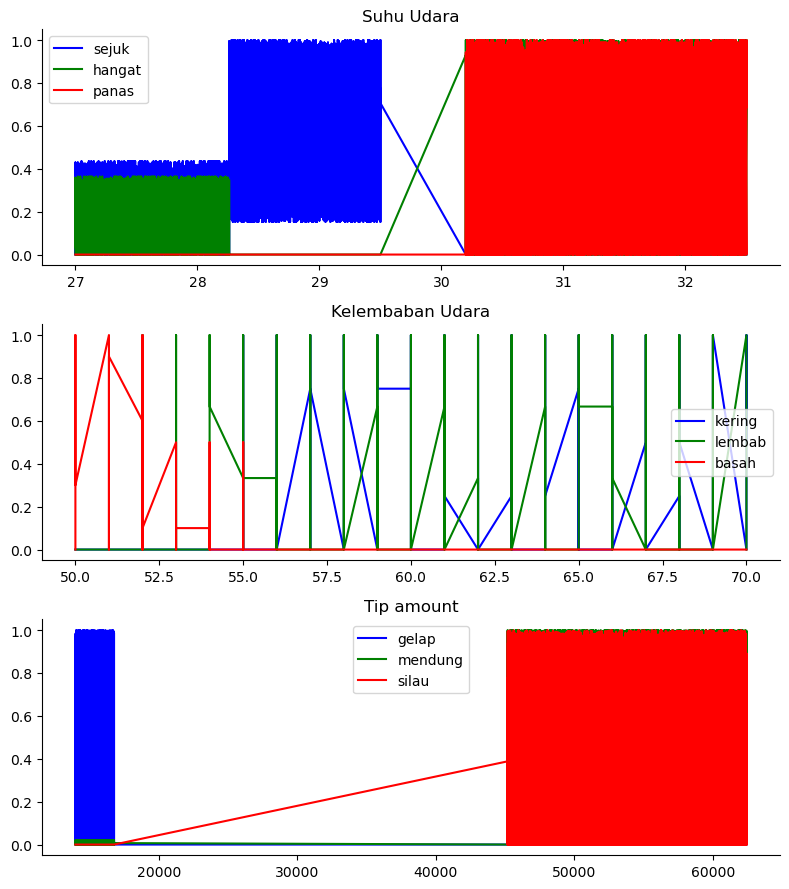

In [22]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_suhua, df_fuzz['suhu udara_rendah'], 'b', linewidth=1.5, label='sejuk')
ax0.plot(x_suhua, df_fuzz['suhu udara_tengah'], 'g', linewidth=1.5, label='hangat')
ax0.plot(x_suhua, df_fuzz['suhu udara_tinggi'], 'r', linewidth=1.5, label='panas')
ax0.set_title('Suhu Udara')
ax0.legend()

ax1.plot(x_kelema, df_fuzz['kelembaban udara_rendah'], 'b', linewidth=1.5, label='kering')
ax1.plot(x_kelema, df_fuzz['kelembaban udara_tengah'], 'g', linewidth=1.5, label='lembab')
ax1.plot(x_kelema, df_fuzz['kelembaban udara_tinggi'], 'r', linewidth=1.5, label='basah')
ax1.set_title('Kelembaban Udara')
ax1.legend()

ax2.plot(x_cahaya, df_fuzz['cahaya_rendah'], 'b', linewidth=1.5, label='gelap')
ax2.plot(x_cahaya, df_fuzz['cahaya_tengah'], 'g', linewidth=1.5, label='mendung')
ax2.plot(x_cahaya, df_fuzz['cahaya_tinggi'], 'r', linewidth=1.5, label='silau')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [23]:
def multifuzzu(attrs):
    out = []
    for x in attrs:
        df_fuzzu = pd.DataFrame()
        desc = df[x].describe()
        rendah = fuzz.trimf(df[x].unique(),[desc['min'],desc['min'],desc['25%']])
        tengah = fuzz.trimf(df[x].unique(),[desc['25%'],desc['50%'],desc['75%']])
        tinggi = fuzz.trimf(df[x].unique(),[desc['75%'],desc['max'],desc['max']])
        df_fuzzu[x+'_rendah'] = pd.Series(rendah)
        df_fuzzu[x+'_tengah'] = pd.Series(tengah)
        df_fuzzu[x+'_tinggi'] = pd.Series(tinggi)
        out.append(df_fuzzu)
    return out

In [24]:
df_fuzzu = multifuzzu(['suhu udara', 'kelembaban udara', 'suhu tanah',
       'kelembaban tanah', 'cahaya', 'arus solar', 'arus aki',
       'tegangan solar', 'tegangan aki'])

In [25]:
for x in df_fuzzu:
    print(len(x))

482
21
951
101
18305
124
93
2189
4338


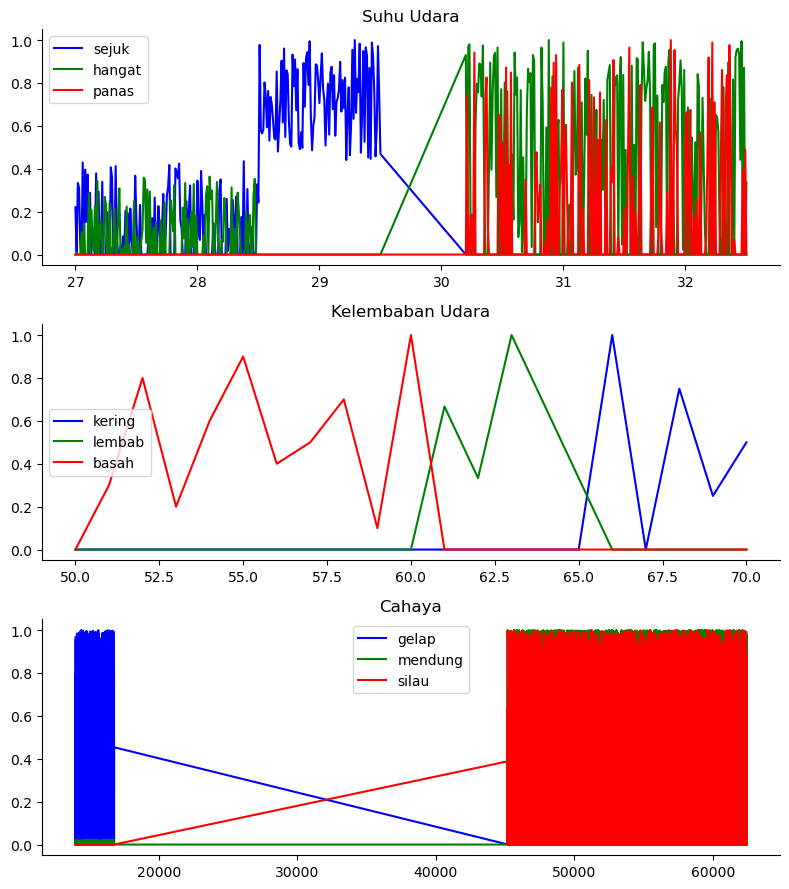

In [26]:
x_suhua = np.sort(df['suhu udara'].unique(), axis=0)
x_kelema = np.sort(df['kelembaban udara'].unique(), axis=0)
x_cahaya = np.sort(df['cahaya'].unique(), axis=0)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_suhua, df_fuzzu[0]['suhu udara_rendah'], 'b', linewidth=1.5, label='sejuk')
ax0.plot(x_suhua, df_fuzzu[0]['suhu udara_tengah'], 'g', linewidth=1.5, label='hangat')
ax0.plot(x_suhua, df_fuzzu[0]['suhu udara_tinggi'], 'r', linewidth=1.5, label='panas')
ax0.set_title('Suhu Udara')
ax0.legend()

ax1.plot(x_kelema, df_fuzzu[1]['kelembaban udara_rendah'], 'b', linewidth=1.5, label='kering')
ax1.plot(x_kelema, df_fuzzu[1]['kelembaban udara_tengah'], 'g', linewidth=1.5, label='lembab')
ax1.plot(x_kelema, df_fuzzu[1]['kelembaban udara_tinggi'], 'r', linewidth=1.5, label='basah')
ax1.set_title('Kelembaban Udara')
ax1.legend()

ax2.plot(x_cahaya, df_fuzzu[4]['cahaya_rendah'], 'b', linewidth=1.5, label='gelap')
ax2.plot(x_cahaya, df_fuzzu[4]['cahaya_tengah'], 'g', linewidth=1.5, label='mendung')
ax2.plot(x_cahaya, df_fuzzu[4]['cahaya_tinggi'], 'r', linewidth=1.5, label='silau')
ax2.set_title('Cahaya')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()